### 10botics Chiense Character Classification Competition (STUDENT VERSION)
Billy Hau (7/22/2022)

Kaggle Competition Link
<br>
<a href='https://www.kaggle.com/t/b25101f8db37457b93f26800b0bfb110'>https://www.kaggle.com/t/b25101f8db37457b93f26800b0bfb110</a>

<br>
Submission CSV Format
<br>
<br>
<table>
<tr>
    <th>id</th>
    <th>character</th>
</tr>
<tr>
    <td>0</td>
    <td>万</td>
</tr>
<tr>
    <td>1</td>
    <td>千</td>
</tr>
<tr>
    <td>2</td>
    <td>亿</td>
</tr>
<tr>
    <td>...</td>
    <td>...</td>
</tr>

In [160]:
# Install Nature Sort Library (natsort)
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
# !wget https://github.com/sdip15fa/kaggle/raw/master/deep-learning/image-classification/code.zip
# !unzip code.zip

In [162]:
# Import Libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import natsort;
import glob;
from PIL import Image;
from sklearn.model_selection import train_test_split;
from tensorflow import keras
import tensorflow as tf

In [163]:
# Load Training Labels
df_train = pd.read_csv('train.csv')
df_train


,id,character
0,0,四
1,1,十
2,2,一
3,3,万
4,4,四
...,...,...
11995,11995,千
11996,11996,四
11997,11997,万
11998,11998,亿


In [164]:
# Get Training Image Path
img_path_train = glob.glob('train_img/*.jpg')
# img_path_train

In [165]:
# Sort the Training Image Path
img_path_train = natsort.natsorted(img_path_train)
# img_path_train

In [166]:
# Get Training Image Path and Sort
img_path_test = glob.glob('test_img/*.jpg')
# img_path_test = natsort.natsorted(img_path_test)
img_path_test

['test_img/2018.jpg',
 'test_img/1672.jpg',
 'test_img/2427.jpg',
 'test_img/80.jpg',
 'test_img/1547.jpg',
 'test_img/1470.jpg',
 'test_img/2925.jpg',
 'test_img/426.jpg',
 'test_img/2668.jpg',
 'test_img/1557.jpg',
 'test_img/2205.jpg',
 'test_img/1208.jpg',
 'test_img/775.jpg',
 'test_img/2967.jpg',
 'test_img/2956.jpg',
 'test_img/2498.jpg',
 'test_img/414.jpg',
 'test_img/2250.jpg',
 'test_img/723.jpg',
 'test_img/1836.jpg',
 'test_img/1952.jpg',
 'test_img/2679.jpg',
 'test_img/1331.jpg',
 'test_img/727.jpg',
 'test_img/716.jpg',
 'test_img/2773.jpg',
 'test_img/2424.jpg',
 'test_img/2343.jpg',
 'test_img/2084.jpg',
 'test_img/2817.jpg',
 'test_img/2260.jpg',
 'test_img/2749.jpg',
 'test_img/1284.jpg',
 'test_img/1143.jpg',
 'test_img/2988.jpg',
 'test_img/2506.jpg',
 'test_img/1343.jpg',
 'test_img/2806.jpg',
 'test_img/1807.jpg',
 'test_img/1764.jpg',
 'test_img/335.jpg',
 'test_img/2275.jpg',
 'test_img/291.jpg',
 'test_img/1422.jpg',
 'test_img/1442.jpg',
 'test_img/293.jpg',

In [167]:
img_path_test = sorted(img_path_test, key=lambda i: int("".join(filter(lambda a: a.isdigit(), i))))


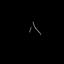

八


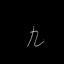

九


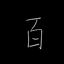

百


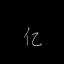

亿


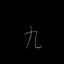

九


In [168]:
# Random Sample 5 Training Images and Print the Character
index_list = np.random.randint(0, len(img_path_train), 5)

for i in index_list:
    display(Image.open(img_path_train[i]))
    print(df_train['character'][i])

In [169]:
# Construct a List of Image Array for the Training Dataset (X_train)
from tensorflow.keras.utils import image_dataset_from_directory

from keras.preprocessing.image import ImageDataGenerator

imageDataGen = ImageDataGenerator(zoom_range=0.2)

X_train = imageDataGen.flow_from_directory('train_img/train', target_size=(128,128), shuffle=True)
X_valid = imageDataGen.flow_from_directory('train_img/valid', target_size=(128,128), shuffle=True)

# Convert into Numpy Array
# X_train = np.array(X_train))

# Construct a List of Image Array for the Training Dataset (X_test)
# X_test = [np.array(Image.open(path)) for path in img_path_test]

# Convert into Numpy Array
# X_test = np.array(X_test)

# Data Pipeline


def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label


"""AUTOTUNE = tf.data.experimental.AUTOTUNE
X_train = (
    X_train
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
X_valid = (
    X_valid
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)"""

Found 9600 images belonging to 15 classes.
Found 2400 images belonging to 15 classes.


'AUTOTUNE = tf.data.experimental.AUTOTUNE\nX_train = (\n    X_train\n    .map(convert_to_float)\n    .cache()\n    .prefetch(buffer_size=AUTOTUNE)\n)\nX_valid = (\n    X_valid\n    .map(convert_to_float)\n    .cache()\n    .prefetch(buffer_size=AUTOTUNE)\n)'

In [170]:
df_test = imageDataGen.flow_from_dataframe(pd.DataFrame({"filename": img_path_test}), shuffle=False,class_mode=None, target_size=(128, 128))

Found 3000 validated image filenames.


Let's flatten the image to feed into the ML models...

<img src='https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png' width='300px'>

In [171]:
# Reshape X_train and X_test into 2D arrays... they will be an array of flattened (1D) images
# print(X_train.shape)
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [172]:
# Import ML Libraries
import tensorflow as tf
from tensorflow import keras

In [173]:
pretrained_base = tf.keras.models.load_model(
    './vgg16-pretrained-base',
)
pretrained_base.trainable = False

In [174]:
# Build Model - reference class presentation if need help selecting layers

# input = keras.Input(X_train.shape)

# x = keras.layers.Dense(256, activation='elu')(input)
# for i in range(0, 5):
#    x = keras.layers.BatchNormalization()(x)
#    x = keras.layers.Dropout(0.4)(x)
#    x = keras.layers.Dense(256, activation='elu')(x)

model = keras.Sequential([
    pretrained_base,
     #keras.layers.Input(shape=(64, 64, 3)),
    # keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(15, activation='softmax')
])

# output = keras.layers.Dense(Y_train.shape[1], activation='softmax')(x)

# model = keras.Model(inputs=input, outputs=output)


In [175]:
# Compile Model (Adam / Categorical Cross Entrophy / Categorical Accuracy)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [176]:
# x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [177]:
# Train Model
earlyStop = keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy', patience=5, restore_best_weights=True, min_delta=0.001)
history = model.fit(X_train, epochs=1000, callbacks=[
                    earlyStop], validation_data=X_valid)


Epoch 1/1000
300/300 [==============================] - 23s 76ms/step - loss: 0.3858 - categorical_accuracy: 0.8892 - val_loss: 0.1476 - val_categorical_accuracy: 0.9429
Epoch 2/1000
300/300 [==============================] - 20s 68ms/step - loss: 0.0892 - categorical_accuracy: 0.9721 - val_loss: 0.0873 - val_categorical_accuracy: 0.9675
Epoch 3/1000
300/300 [==============================] - 21s 69ms/step - loss: 0.0885 - categorical_accuracy: 0.9735 - val_loss: 0.0988 - val_categorical_accuracy: 0.9688
Epoch 4/1000
300/300 [==============================] - 20s 68ms/step - loss: 0.0586 - categorical_accuracy: 0.9830 - val_loss: 0.0656 - val_categorical_accuracy: 0.9767
Epoch 5/1000
300/300 [==============================] - 21s 71ms/step - loss: 0.0501 - categorical_accuracy: 0.9841 - val_loss: 0.0646 - val_categorical_accuracy: 0.9825
Epoch 6/1000
300/300 [==============================] - 20s 68ms/step - loss: 0.0351 - categorical_accuracy: 0.9883 - val_loss: 0.1026 - val_categoric

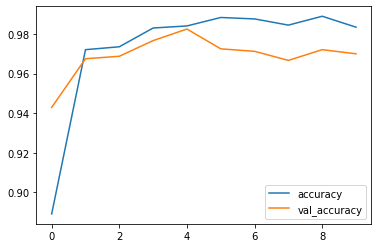

In [178]:
# Plot model accuracy and evaluate the model... are you overfitted? Underfitted?
# Try adding Dropout and BatchNormalization to avoid overfitting
# Try adding more "complexity" to get a better fit (aka layes and nodes)

plt.plot(history.history['categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_accuracy')
plt.legend()

In [179]:
# Let's do a prediction over X_val and see how the model do
"""
prediction = model.predict(x_val,batch_size=512)

index_list = np.random.randint(0, len(x_val), 10)

for id in index_list:
    plt.figure()
    plt.imshow(x_val[id].reshape((64,64)))
    print(f'true: {y_train.columns[np.argmax(y_val.iloc[id])]} \t predict: {y_train.columns[np.argmax(prediction[id])]}')
"""

"\nprediction = model.predict(x_val,batch_size=512)\n\nindex_list = np.random.randint(0, len(x_val), 10)\n\nfor id in index_list:\n    plt.figure()\n    plt.imshow(x_val[id].reshape((64,64)))\n    print(f'true: {y_train.columns[np.argmax(y_val.iloc[id])]} \t predict: {y_train.columns[np.argmax(prediction[id])]}')\n"

In [180]:
# Run the Model on the Testing Dataset
prediction_test = model.predict(df_test, batch_size=4096)


In [181]:
# Let's Check the Shape of the Prediction and Somehow get it into Submission Format
prediction_test.shape

(3000, 15)

In [182]:
# Find the Index of the Most Likely Column for each Row
prediction_test2 = np.argmax(prediction_test, axis=1)
prediction_test2

pd.Series(prediction_test2).value_counts()

14    215
5     212
3     211
4     210
10    207
13    207
1     204
12    203
2     200
9     195
6     195
11    195
0     183
8     182
7     181
dtype: int64

In [183]:
X_valid.class_indices

{'一': 0,
 '七': 1,
 '万': 2,
 '三': 3,
 '九': 4,
 '二': 5,
 '五': 6,
 '亿': 7,
 '八': 8,
 '六': 9,
 '十': 10,
 '千': 11,
 '四': 12,
 '百': 13,
 '零': 14}

In [184]:
class_dict = {v: k for k, v in X_valid.class_indices.items()}


In [185]:
# Now, need to transform these index into column names
import os
prediction_test3 = []

for id in prediction_test2:
    prediction_test3.append(class_dict[id])

In [186]:
# let's Preview the List
prediction_test3

['一',
 '六',
 '八',
 '五',
 '六',
 '二',
 '十',
 '百',
 '十',
 '八',
 '八',
 '八',
 '千',
 '七',
 '九',
 '千',
 '万',
 '七',
 '万',
 '一',
 '六',
 '一',
 '亿',
 '一',
 '七',
 '二',
 '五',
 '九',
 '二',
 '十',
 '三',
 '万',
 '二',
 '三',
 '七',
 '十',
 '一',
 '九',
 '六',
 '零',
 '八',
 '三',
 '三',
 '九',
 '二',
 '百',
 '百',
 '七',
 '六',
 '千',
 '四',
 '三',
 '四',
 '零',
 '十',
 '四',
 '八',
 '千',
 '百',
 '百',
 '一',
 '一',
 '三',
 '二',
 '零',
 '百',
 '九',
 '八',
 '三',
 '六',
 '六',
 '百',
 '九',
 '零',
 '六',
 '亿',
 '七',
 '七',
 '五',
 '十',
 '亿',
 '百',
 '四',
 '九',
 '七',
 '七',
 '八',
 '千',
 '千',
 '四',
 '亿',
 '千',
 '六',
 '零',
 '六',
 '百',
 '九',
 '三',
 '七',
 '一',
 '万',
 '三',
 '二',
 '零',
 '四',
 '千',
 '亿',
 '千',
 '万',
 '九',
 '千',
 '三',
 '百',
 '零',
 '六',
 '零',
 '万',
 '二',
 '一',
 '二',
 '七',
 '八',
 '三',
 '零',
 '亿',
 '六',
 '万',
 '零',
 '千',
 '零',
 '万',
 '三',
 '一',
 '一',
 '一',
 '零',
 '一',
 '五',
 '八',
 '亿',
 '十',
 '三',
 '九',
 '六',
 '四',
 '七',
 '八',
 '四',
 '千',
 '万',
 '七',
 '五',
 '二',
 '九',
 '百',
 '五',
 '二',
 '四',
 '百',
 '九',
 '亿',
 '三',
 '五',
 '零',
 '五',
 '百',
 '二'

In [187]:
# Put this into a DataFrame and Format for Export
df_kaggle = pd.DataFrame(prediction_test3, columns=['character'])
df_kaggle.index.name = 'id'
df_kaggle


,character
id,
0,一
1,六
2,八
3,五
4,六
...,...
2995,千
2996,四
2997,百


In [188]:
# Export DataFrame for Kaggle Grade
df_kaggle.to_csv('kaggle_submission.csv', index=True)